# Evaluating the performance of a simple learning system on a real-world dataset.

### LOADING  PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

### DATA LOAD AND PROCESSING


In [2]:
df = pd.read_csv("C:/Users/DELL/Downloads/ML/assignment 3/Data_lncRNA_2_cancers.csv")  #Loading Data

In [3]:
df.head()

,Ensembl_ID,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,...,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4,Class
0,TCGA-05-4244-01A,2.979519,0.00000,1.894481,0.000000,0.094936,1.601225,0.0,0.843660,1.822328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
1,TCGA-05-4250-01A,1.761075,0.00000,1.512506,0.000000,0.063790,2.260509,0.0,1.244437,1.346487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
2,TCGA-05-4382-01A,2.527333,0.00000,1.473132,0.080562,0.314608,1.695952,0.0,1.358939,1.413738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
3,TCGA-05-4384-01A,2.300864,0.39099,1.507538,0.029133,2.307563,2.058446,0.0,1.158064,1.711065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
4,TCGA-05-4389-01A,2.388600,0.00000,1.870401,0.000000,0.119019,1.681496,0.0,0.577340,1.378387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD


In [4]:
df.shape    #cheching number of columns

(1008, 12311)

<AxesSubplot:xlabel='Class', ylabel='count'>

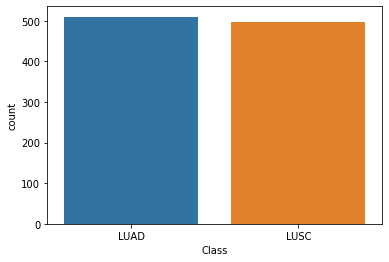

In [5]:
sns.countplot(x='Class',data=df)      #plotting values of classes

As by plotting this we can see that Data is Balanced as LUAD and LUSC have same amount of Data

In [6]:
df.describe()  # data stats

,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,ENSG00000122043.9,...,ENSGR0000185203.10,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,...,1008.0,1008.0,1008.0,1008.0,1008.0,1008.0,1008.0,1008.0,1008.0,1008.0
mean,2.788473,0.094598,1.947458,0.074587,0.587350,1.787522,0.007063,1.153817,1.757691,0.031894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.660256,0.363470,0.580227,0.252156,0.827852,0.485842,0.033616,0.336113,0.461494,0.045119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.712480,0.000000,0.657250,0.000000,0.003343,0.776109,0.000000,0.216514,0.651135,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.348305,0.000000,1.560848,0.000000,0.085885,1.441346,0.000000,0.927522,1.439138,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2.752431,0.000000,1.872609,0.014276,0.186553,1.736476,0.000000,1.143120,1.724637,0.018317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.220147,0.089984,2.216565,0.054177,0.740028,2.056712,0.000000,1.347181,2.032612,0.045064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.817245,6.622685,5.060924,3.528672,5.884712,3.774374,0.585911,2.726657,4.045429,0.548163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Columns: 12311 entries, Ensembl_ID to Class
dtypes: float64(12309), object(2)
memory usage: 94.7+ MB


In [8]:
df.isnull().sum()    #Checking if any null value in Data

Ensembl_ID            0
ENSG00000005206.15    0
ENSG00000083622.8     0
ENSG00000088970.14    0
ENSG00000099869.7     0
                     ..
ENSGR0000236017.6     0
ENSGR0000236871.5     0
ENSGR0000237531.4     0
ENSGR0000270726.4     0
Class                 0
Length: 12311, dtype: int64

As we have seen all data and undersatnd it,Now we will be proceeding using labelencoder to convert class into values. 

In [9]:
label= LabelEncoder()
df['Class'] = label.fit_transform(df['Class'])

In [10]:
df.Class

0       0
1       0
2       0
3       0
4       0
       ..
1003    1
1004    1
1005    1
1006    1
1007    1
Name: Class, Length: 1008, dtype: int32

As now we can see that Names are converted into values.

Now we will move towards Train test split and assigning X and Y

In [11]:
x = df.drop(['Class', 'Ensembl_ID'], axis =1)
y = df['Class']

In [12]:
x.shape

(1008, 12309)

In [13]:
y.shape

(1008,)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [15]:
X_train.shape

(806, 12309)

In [16]:
X_test.shape

(202, 12309)

## SUPPORT VECTOR MACHINE

In [17]:
support = SVC()
model = support.fit(X_train,y_train)
y_pred = support.predict(X_test)

In [18]:
print(accuracy_score(y_test,y_pred))

0.9603960396039604


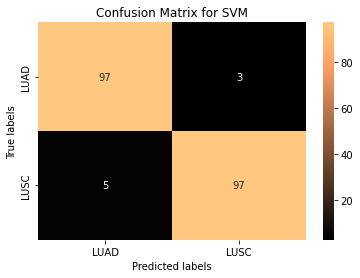

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, cmap='copper', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SVM'); 
ax.xaxis.set_ticklabels(['LUAD', 'LUSC']); ax.yaxis.set_ticklabels(['LUAD', 'LUSC']);

In [20]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.97      0.95      0.96       102

    accuracy                           0.96       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.96      0.96      0.96       202



<function matplotlib.pyplot.show(close=None, block=None)>

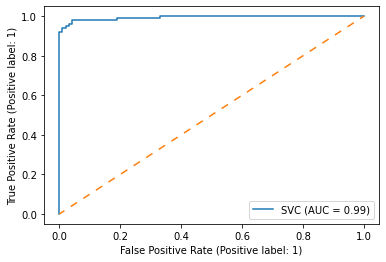

In [21]:
from sklearn.metrics import RocCurveDisplay
svm_c = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle=(1, (5,5)), label= 'Random guess')
plt.show

Support Vector Machine is giving 0.96 accuracy and precision of 0.95 on 0 class (LUAD) and 0.97 on 1 class (LUSC). We can see recall and f1-score in above table.


## RANDOM FOREST CLASSIFIER

In [22]:
random = RandomForestClassifier()
model1 = random.fit(X_train,y_train)
y_pred1 = random.predict(X_test)

In [23]:
print(accuracy_score(y_test,y_pred1))

0.9653465346534653


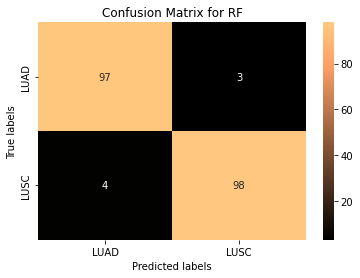

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred1)

ax= plt.subplot()
sns.heatmap(confusion_matrix1, annot=True, cmap='copper', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for RF'); 
ax.xaxis.set_ticklabels(['LUAD', 'LUSC']); ax.yaxis.set_ticklabels(['LUAD', 'LUSC']);

In [25]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.97      0.96      0.97       102

    accuracy                           0.97       202
   macro avg       0.97      0.97      0.97       202
weighted avg       0.97      0.97      0.97       202



<function matplotlib.pyplot.show(close=None, block=None)>

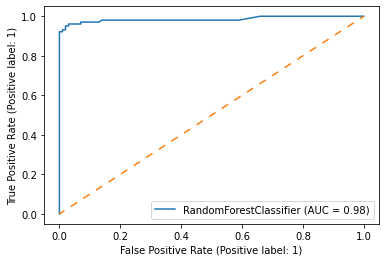

In [26]:
from sklearn.metrics import RocCurveDisplay
rf_c = RocCurveDisplay.from_estimator(model1, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle=(1, (5,5)), label= 'Random guess')
plt.show

This shows us that Random forest is giving 0.96 numbers in every field, which means it has accuracy, recall, precision and f1 score of 96 percent. 

## ROC CURVE COMPARSION

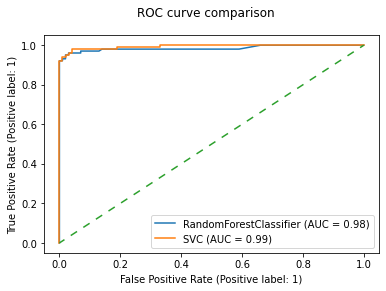

In [28]:
from sklearn.metrics import plot_roc_curve
fig = plot_roc_curve( model1, X_test, y_test)
fig = plot_roc_curve( model, X_test, y_test, ax = fig.ax_)
plt.plot([0, 1], [0, 1], linestyle=(1, (5,5)), label= 'Random guess')
fig.figure_.suptitle("ROC curve comparison")
plt.show() 

This plot explains as Fpr is false positive rate and tpr is true positive rate thresholds are different probability cutoffs that separate the two classes. First, we are taking values from real y labels and predicted y of the model, these three values and after that we are just plotting these things on a graph. Taking tpr on y axis and fpr on x axis. As the score is close to 1 it means that model is working well and has the ability to do class action between two classes. By looking at this plot we can say that both of the model has 0.96 ability to separate between two classes. There is not much different between both models ROC Curve and AUC score.

## Conclusion
As we have used two machine learning Model for lungs cancer prediction, we can see that both model gave similar accuracy and result on metrics of test data, However as Random Forest have constant 0.96 score and SVM has 0.95 score in precision and recall i will give more preference to Random Forest as it gave a consistent score of 0.96 is better than variation in scores whereby in SVM we have some issue in precision of 0 and recall of 1, so giving more preference to consistency in this case.